In [39]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
import seaborn as sns 
from scipy.stats import gaussian_kde

##### Laboratory 2
##### ------------

Part 1:

Сгенерировать выборку случайных чисел размером 100 и 1000 для двух
распределений – экспоненциального и нормального. Для созданных выборок сделать
следующее:
1. Посчитать выборочное среднее и дисперсию, сравнить с математическим
ожиданием соответствующих распределений;
2. Посчитать 0.5 и 0.99 квантили, сравнить с соответствующими теоретическими
значениями;
3. Построить гистограмму распределения;
4. Построить функцию распределения случайной величины на основе выборки (на
одном графике показать функции распределения, полученные из выборок
разного размера и теоретическую);
5. Построить плотность распределения случайной величины на основе выборки (на
одном графике показать плотности распределения, полученные из выборок
разного размера и теоретическую).
В итоге проанализировать зависимость точности аппроксимации от количества
экспериментов.


<h3>Creating exponentials and normal distributions</h3>



In [40]:
exp_100 = np.random.exponential(1,size=100)
exp_1000 = np.random.exponential(1,size=1000)
# λ(inverse, интенсивность) - was selected as 1

norm_100 = np.random.normal(0,1 , size = 100)
norm_1000 = np.random.normal(0,1 , size = 1000)
# μ(mean, математичекское ожидание) = 0  and σ(variance, стандартное отклонение) = 1

1. Посчитать выборочное среднее и дисперсию, сравнить с математическим
ожиданием соответствующих распределений;

In [41]:
print(f"Mean for exp 100 -> {np.mean(exp_100)}")
print(f"Mean for exp 1000 -> {np.mean(exp_1000)}")

print(f"Mean for norm 100 -> {np.mean(norm_100)}")
print(f"Mean for norm 1000 -> {np.mean(norm_1000)}")



Mean for exp 100 -> 1.0346969665996086
Mean for exp 1000 -> 1.0066598059918683
Mean for norm 100 -> -0.08756494404185461
Mean for norm 1000 -> 0.02543022202017819


<h4>Comparison</h4>

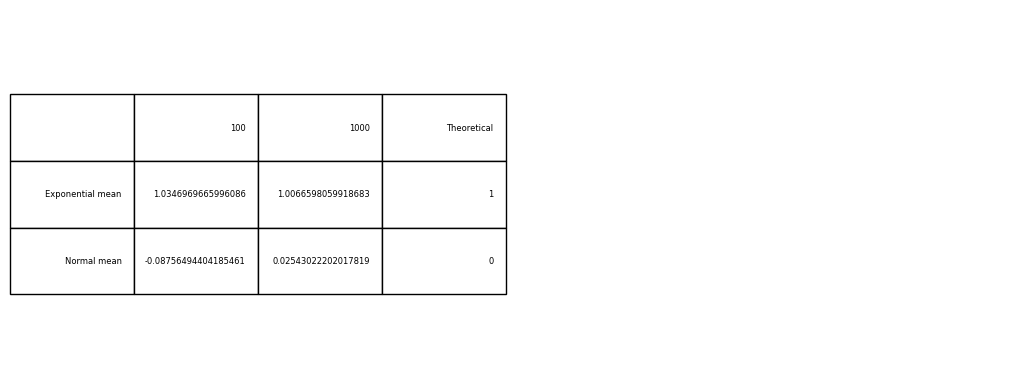

In [42]:
mean_e_100 = np.mean(exp_100)
mean_e_1000 = np.mean(exp_1000)

mean_n_100 = np.mean(norm_100)
mean_n_1000 = np.mean(norm_1000)

#Theoretical is 1 / λ = 1
theoretical_mean_e = 1

#Theoretical is μ = 0
theoretical_mean_n = 0

#define figure and axes
fig, ax = plt.subplots()

#create values for table
table_data=[
 ["", 100 , 1000 , "Theoretical"],
 ["Exponential mean", mean_e_100, mean_e_1000, theoretical_mean_e],
 ["Normal mean", mean_n_100, mean_n_1000, theoretical_mean_n]
]

#create table
table = ax.table(cellText=table_data, loc='left')

#modify table
table.set_fontsize (40)
table. scale (1,4)
ax.axis('off')

#display table
plt.show() 

2.Посчитать 0.5 и 0.99 квантили, сравнить с соответствующими теоретическими
значениями;

In [43]:
print(f'Quantile for 0.5 exp_100 is {np.quantile(exp_100 , 0.5)}' )
print(f'Quantile for 0.5 exp_1000 is {np.quantile(exp_1000 , 0.5)}' )
print(f'Quantile for 0.99 exp_100 is {np.quantile(exp_100 , 0.99)}' )
print(f'Quantile for 0.99 exp_1000 is {np.quantile(exp_1000 , 0.99)}' )

print(f'Quantile for 0.5 nor_100 is {np.quantile(exp_100 , 0.5)}' )
print(f'Quantile for 0.5 exp_1000 is {np.quantile(exp_1000 , 0.5)}' )
print(f'Quantile for 0.99 exp_100 is {np.quantile(exp_100 , 0.99)}' )
print(f'Quantile for 0.99 exp_1000 is {np.quantile(exp_1000 , 0.99)}' )



Quantile for 0.5 exp_100 is 0.7811090462790626
Quantile for 0.5 exp_1000 is 0.6935215704659445
Quantile for 0.99 exp_100 is 4.758612665983664
Quantile for 0.99 exp_1000 is 4.405823327560442
Quantile for 0.5 nor_100 is 0.7811090462790626
Quantile for 0.5 exp_1000 is 0.6935215704659445
Quantile for 0.99 exp_100 is 4.758612665983664
Quantile for 0.99 exp_1000 is 4.405823327560442


<h5>3.Comparison with theoretical and drawing histogram</h5>

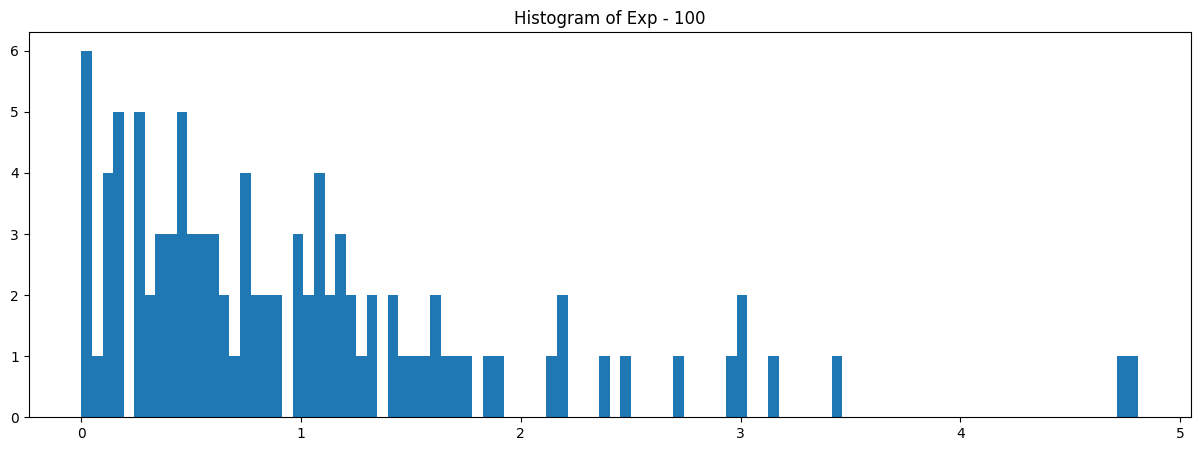

mean:  1.0346969665996086 | origin 1
Variance:  0.9045013806556059 | origin 1
Quantile 05:  0.7811090462790626 | origin 0.693
Quantile 99:  4.758612665983664 | origin 4.6




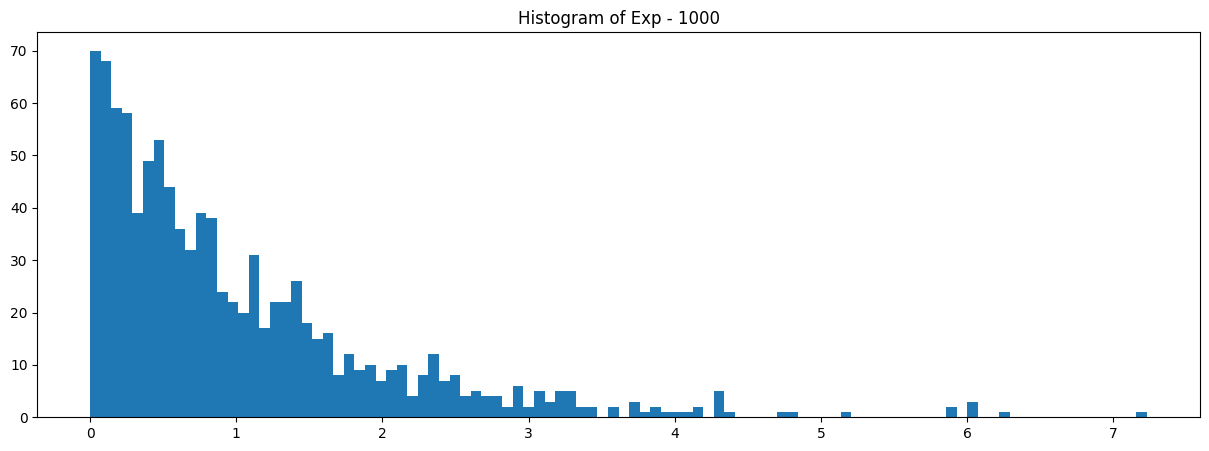

mean:  1.0066598059918683 | origin 1
Variance:  1.018030099479803 | origin 1
Quantile 05:  0.6935215704659445 | origin 0.693
Quantile 99:  4.405823327560442 | origin 4.6




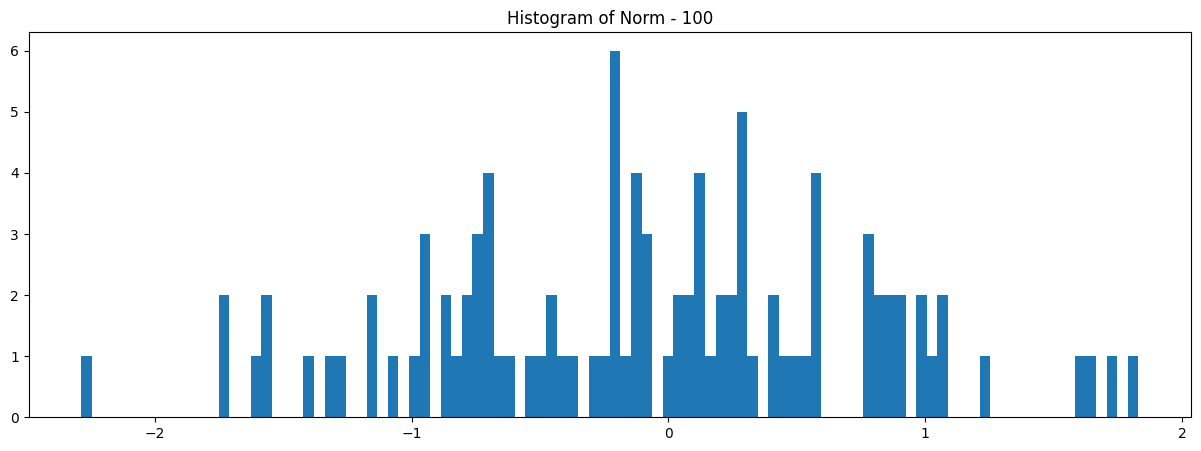

mean:  -0.08756494404185461 | origin 0
Variance:  0.6825295662765073 | origin 1
Quantile 05:  -0.10157462745398714 | origin 0
Quantile 99:  1.7190503692034884 | origin 2.326




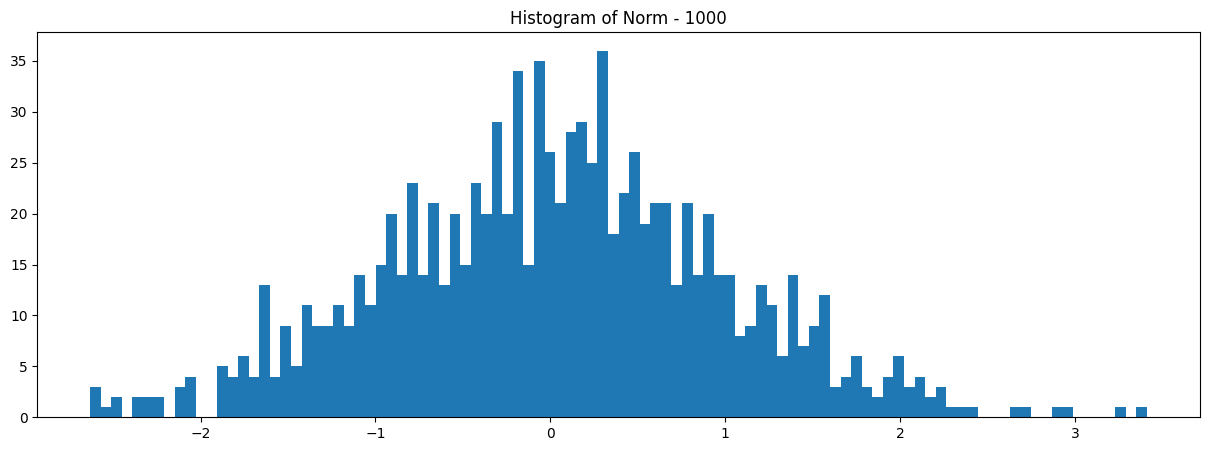

mean:  0.02543022202017819 | origin 0
Variance:  0.9339066052524337 | origin 1
Quantile 05:  0.027221633332515906 | origin 0
Quantile 99:  2.2313925641763843 | origin 2.326




In [44]:
theor_norm_q_h = 0
theor_norm_q_o = 2.326 
theor_exp_q_h = 0.693
theor_exp_q_o = 4.6

info = {"Exp - 100":exp_100, "Exp - 1000":exp_1000,"Norm - 100" : norm_100, "Norm - 1000" : norm_1000}

norm_mean = 0
norm_std = 1
exp_scale = 1

for distribution in info:
    m = np.mean(info[distribution])
    v = np.var(info[distribution])
    quantil_05 = np.quantile(info[distribution], q = 0.5)
    quantil_99 = np.quantile(info[distribution], q = 0.99)
    plt.figure(figsize= (15 , 5))
    plt.hist(info[distribution], bins=100)
    plt.title(f"Histogram of {distribution}")
    plt.show()
    
    if "Exp" in distribution:
        print(f"mean:  {m} | origin {exp_scale}")
        print(f"Variance:  {v} | origin {exp_scale}")
        print(f"Quantile 05:  {quantil_05} | origin {theor_exp_q_h}") 
        print(f"Quantile 99:  {quantil_99} | origin {theor_exp_q_o}")
        print("\n")
    else:
        print(f"mean:  {m} | origin {norm_mean}")
        print(f"Variance:  {v} | origin {norm_std}")
        print(f"Quantile 05:  {quantil_05} | origin {theor_norm_q_h}") 
        print(f"Quantile 99:  {quantil_99} | origin {theor_norm_q_o}")
        print("\n")

<h5>4.Построить функцию распределения случайной величины на основе выборки (на
одном графике показать функции распределения, полученные из выборок
разного размера и теоретическую)</h5>

In [45]:
def function_exp(l , a):
    result = 1 - np.exp(-l * a)
    return result 

<h5>Drawing theoretical graph</h5>

<h5> Making values for our graph</h5>

In [46]:
theory_exp_x = np.linspace(0, 10 , 100)
theory_exp_y = function_exp(1 , theory_exp_x)

#### Making copy of our exp and sorting it
####

In [47]:
exp_100_s = sorted(np.copy(exp_100))
exp_1000_s = sorted(np.copy(exp_1000))

      * uniformly made array in range *

In [48]:
exp_100_y = np.arange(0. , 1., 0.01)
exp_1000_y = np.arange(0. , 1. , 0.001)

Plotting our theoretical graph


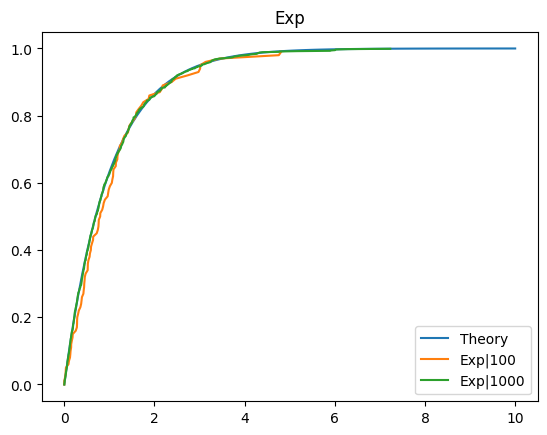

In [49]:
plt.figure(dpi = 100)
plt.title('Exp')
plt.plot(theory_exp_x, theory_exp_y, label="Theory")
plt.plot(exp_100_s, exp_100_y, label="Exp|100")
plt.plot(exp_1000_s, exp_1000_y, label="Exp|1000")
plt.legend()

<h5>For Normal Distribution</h5>

      * math.erf() is used to print error functions for numbers *

In [50]:
from math import erf

      * same way as we did for normal *

In [51]:
def f(x , m ,s):
    return 0.5*(1+erf((x-m)/np.sqrt(2*s**2)))

In [52]:
norm_100_s = sorted(np.copy(norm_100))
norm_1000_s = sorted(np.copy(norm_1000))

In [53]:
theory_x_norm = np.linspace(-3,3,100)
theory_y_norm=[]
for i in theory_x_norm:
    theory_y_norm.append(f(i,0,1))

In [54]:
norm_100_y = np.arange(0., 1., 0.01) 
norm_1000_y = np.arange(0., 1., 0.001) 

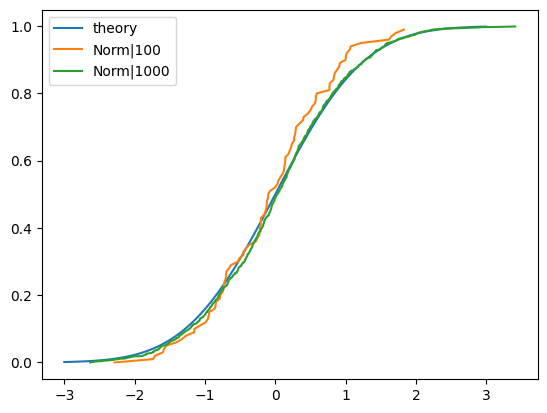

In [55]:
plt.figure(dpi = 100)

plt.plot(theory_x_norm, theory_y_norm, label="theory")
plt.plot(norm_100_s, norm_100_y, label="Norm|100")
plt.plot(norm_1000_s, norm_1000_y, label="Norm|1000")
plt.legend()

<h5>5.Построить плотность распределения случайной величины на основе выборки (на 
одном  графике  показать  плотности  распределения,  полученные  из  выборок 
разного размера и теоретическую).</h5>

In [56]:
def  exp_p(l,x):
    return l*np.exp(-l*x)

In [57]:
theory_exp_p_x = np.linspace(0,10,100)
theory_exp_p_y = exp_p(1, theory_exp_p_x)

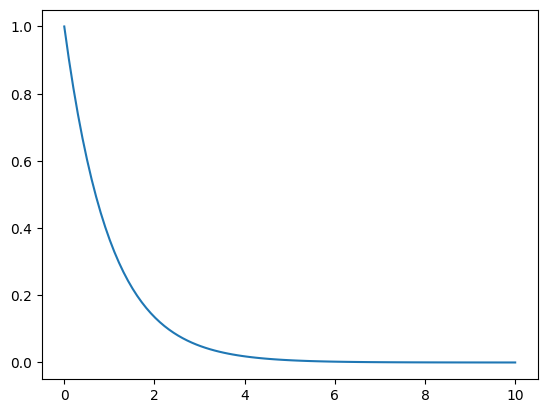

In [58]:
plt.plot(theory_exp_p_x, theory_exp_p_y)

In [59]:
def norm_p(x, m, s):
     return 1/(s*np.sqrt(2*np.pi))*np.exp(-0.5*((x-m)/s)**2)

In [60]:
theory_norm_p_x = np.linspace(-3, 3, 100)
theory_norm_p_y = norm_p(theory_norm_p_x, 0, 1)

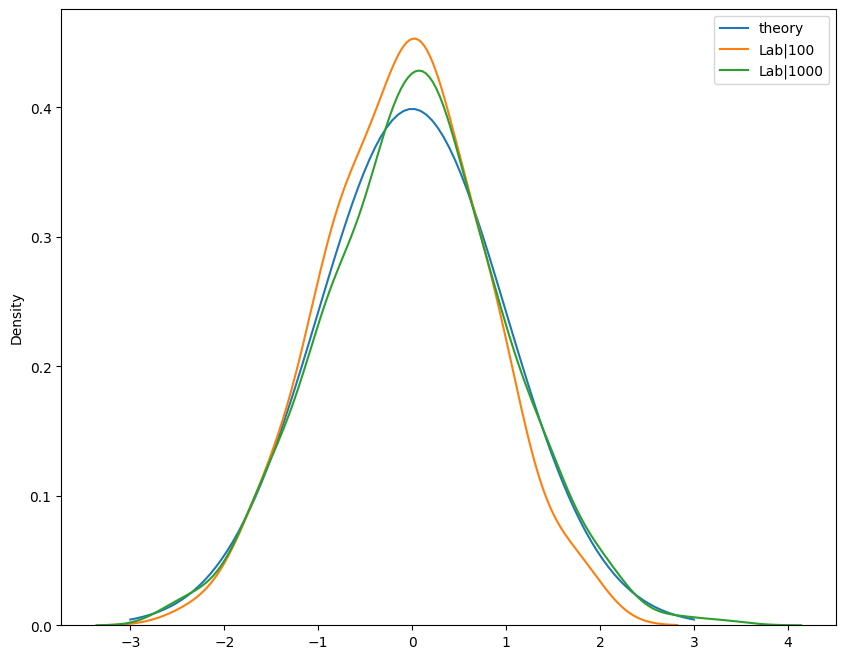

In [61]:
plt.figure(figsize=(10,8))

plt.plot(theory_norm_p_x, theory_norm_p_y, label="theory")
sns.kdeplot(norm_100, label="Lab|100")
sns.kdeplot(norm_1000, label="Lab|1000")
plt.legend()

Part 2:

Сгенерировать три выборки размера 100, 1000 и 10000 для случайных 
расстояний между двумя точками, равномерно распределенные в прямоугольнике со 
сторонами 10 и 30. Получить среднее значение расстояния между точками, построить 
функцию  распределения  вероятностей  и  плотности  вероятностей  случайных 
расстояний.  Показать  разницу  между  соответствующими  функциями  на  одном 
графике.


Function for calculating the distance between points.

In [67]:
def distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

Calculation of distance of the lines.

In [69]:
def distance_line(number):
    a = 10
    b = 30
    distances = []
    for i in range(number):
        x1 = np.random.uniform(0 , a)
        y1 = np.random.uniform(0 , b)
        
        x2 = np.random.uniform(0 , a)
        y2 = np.random.uniform(0 , b)
        
        distances.append(distance(x1,y1,x2,y2))
        
    distances.sort()
    return distances
        

Creating selections(выборки)

In [70]:
l100 = distance_line(100)
l1000 = distance_line(1000)
l10000 = distance_line(10000)

In [71]:
a = 10
b = 30

x100 = np.linspace(0, np.sqrt(a*a + b*b), 100)
x1000 = np.linspace(0, np.sqrt(a*a + b*b), 1000)
x10000 = np.linspace(0, np.sqrt(a*a + b*b), 10000)

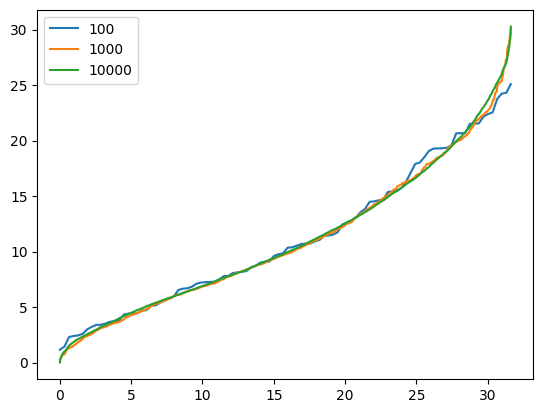

In [76]:
plt.figure(dpi = 100)

plt.plot(x100, l100, label="100")
plt.plot(x1000, l1000, label="1000")
plt.plot(x10000, l10000, label="10000")
plt.legend()

In [73]:
kde_dist_1_y = gaussian_kde(l100).evaluate(l100)
kde_dist_2_y = gaussian_kde(l1000).evaluate(l1000)
kde_dist_3_y = gaussian_kde(l10000).evaluate(l10000)

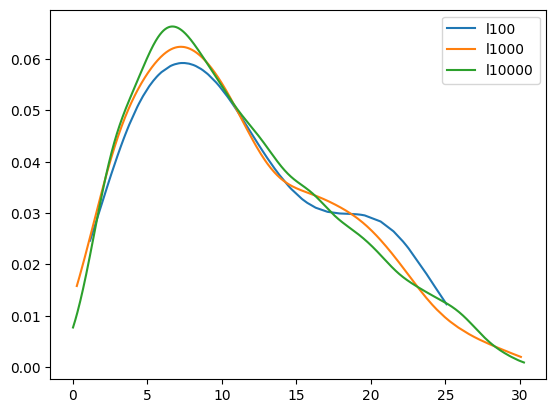

In [75]:
plt.figure(dpi = 100)

plt.plot(l100, kde_dist_1_y, label="l100")
plt.plot(l1000, kde_dist_2_y, label="l1000")
plt.plot(l10000, kde_dist_3_y, label="l10000")

plt.legend()